# Chapter 4: Training Models

## Linear Regression

The goal of a linear regression model is given a training set $\mathbf{X}$ of <i>n</i>-dimensional input vectors
$\mathbf{x}^{(i)}$, we want to find an <i>n</i>-dimensional vector $\theta$ that minimizes

$ MSE\,(\mathbf{X}, h_{\theta}) =
 \frac{1}{n}\sum\limits_{i=1}^n \left( \theta^T \cdot \mathbf{x}^{(i)} - y^{(i)} \right)^2 $

where $MSE$ is the mean squared error of the training set.

### The Normal Equation

One way to find $\theta$ is to use the <i>normal equation</i>:

$\hat{\theta} = \left( \mathbf{X}^T \cdot \mathbf{X} \right)^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y}.$

The example below illustrates how this can equation can be used to train a linear regression model.

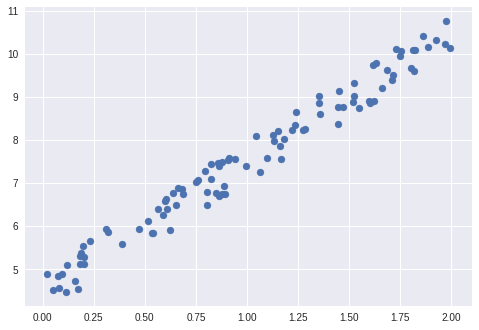

In [0]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

plt.scatter(X, y)
plt.show()

In [0]:
# Computing theta using the np.linalg module. It is not quite (4, 3) as we might
# expect due to the noise.

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.61142034]
 [2.93287934]]


In [0]:
# Making a prediction using the computed values of theta.

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.61142034],
       [10.47717902]])

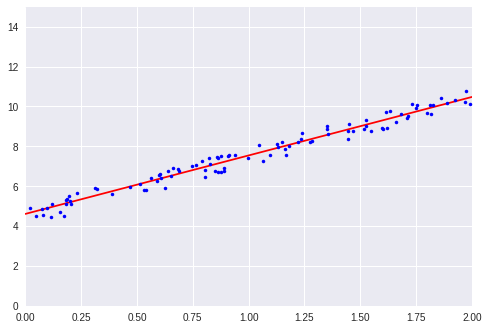

In [0]:
# Plot the model's prediction.

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [0]:
# Equivalent scikit-learn code, we see that we get the same results
# as when we use the normal equation.

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.61142034] [[2.93287934]]
[[ 4.61142034]
 [10.47717902]]


### Computational Complexity

The normal equation computes the inverse of $\mathbf{X}^T \cdot \mathbf{X}$, which is an $O\left(n^3\right)$ operation. This does not scale well for large datasets.

## Gradient Descent

### Batch Gradient Descent

Gradient descent is the process of tweaking parameters slightly until a global minimum is found in the target space
of the cost function.

In the case of linear regression, the partial derivative of each parameter in $\theta$ is

$ \frac{\partial}{\partial\theta_j}\;MSE\,(\theta) =
\frac{2}{m} \sum\limits_{i=1}^m \left( \theta^T\cdot\mathbf{x}^{(i)} \right) x^{(i)}_j. $

The gradient of the cost function is given by

$ \nabla_{\theta}\;MSE\,(\theta) = \frac{2}{m} \; \mathbf{X}^T \cdot (\mathbf{X} \cdot \theta - y). $

The gradient vector points in the direction of most change in the positive direction, so one iteration of
gradient descent is computed as

$ \theta^{(\text{next step})} = \theta - \eta \, \nabla_{\theta}\;MSE\,(\theta) $

where $\eta$ is the <i>learning rate</i> of the algorithm.

In [0]:
# An implmentation of gradient descent. As we can see the result is the same as when
# we used the normal equation.

eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for _ in range(n_iterations):
    gradients = (2. / m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - (eta * gradients)
    
print(theta)

[[4.61142034]
 [2.93287934]]


### Stochastic Gradient Descent

Batch gradient descent can be inefficient since it uses all values in the training set at each step to compute
the gradient, thereby making it an $O\left(n^2\right)$ operation. It also has trouble escaping from global minima.

An alternative is stochastic gradient descent, which picks a single point randomly and computes the gradient using
that one point.

In [0]:
# Implementation of stochastic gradient descent.

n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t + t1)

n = len(X)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  for i in range(n):
    random_index = np.random.randint(n)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta -= eta * gradients
    
print(theta)

[[4.61321616]
 [2.92290853]]


In [0]:
# Scikit-Learn's SGDRegressor implements this algorithm.

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, tol=1e-3)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[4.6036031] [2.94116874]


### Mini-batch Gradient Descent

This algorithm computes the gradient using randomly selected samples from the training set, i.e. "mini-batches." This has an advantage over stochastic gradient descent because the matrix multiplication can be improved using optimized hardware.

## Polynomial Regression

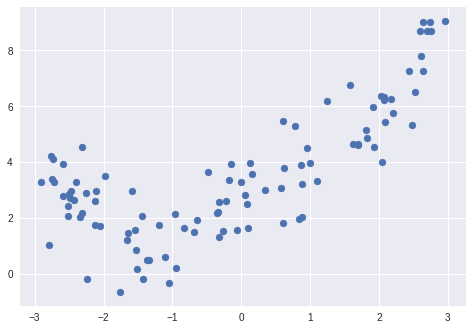

In [0]:
# Generate nonlinear data using a simple quadratic equation.

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [0]:
# Using Scikit-Learn's PolynomialFeatures transformer to add the 2nd degree of
# the polynomial in the feature set as a new feature

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.95188998]
[-0.95188998  0.90609453]


In [0]:
# Now we are able to use the LinearRegressor to predict the data.

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.2832743]), array([[0.9682973, 0.4320871]]))

## Learning Curves

In [0]:
# The following code defines a function for plotting the learning curve of a
# model, a plot of the performance of the model on the training and validation
# set as a function of the training set size.

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
    val_errors.append(mean_squared_error(y_val_predict, y_val))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
  plt.axis([0, 80, 0, 3])
  plt.legend()
  plt.show()

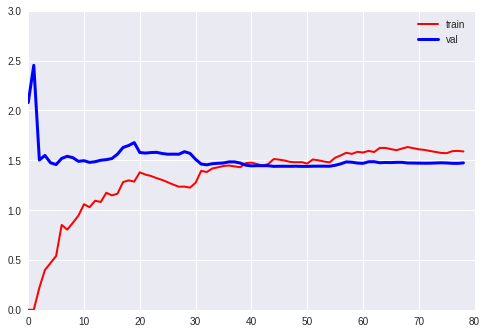

In [0]:
# Plotting the learning curve for linear regression. This is an example of
# an underfitting model, they plateau at a high level.

lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

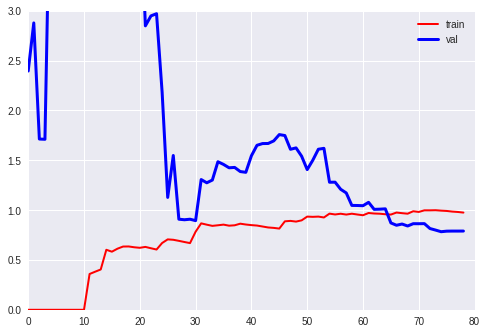

In [0]:
# Plotting the learning curve of a 10 degree polynomial model. This
# is an example of an overfitting model, since there is a large
# gap between the training set error and the validation set error.

from sklearn.pipeline import Pipeline

poly_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curve(poly_regression, X, y)

## Regularized Linear Models

### Ridge Regression

A form of regularized Linear Regression where the <i>regularization</i> term is given by

$ \alpha \sum\limits_{i=1}^n \; \theta_i^2 $,

where $\alpha$ is a configurable hyperparameter. If $\alpha=0$ then the Ridge Regression becomes Linear Regression.
The ridge regression cost function is

$ J(\theta) = MSE\,(\theta) + \frac{\alpha}{2} \sum\limits_{i=1}^n \, \theta_i^2 $.

The Ridge Regression closed-form solution is given by

$ \hat{\theta} =
\left( \mathbf{X}^T \cdot \mathbf{X} + \alpha\mathbf{A} \right)^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y} $.

where $\mathbf{A}$ is the $n \times n$ identity matrix.

In [0]:
# An implementation of Ridge Regression using the closed form solution.

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.05600873]])

In [0]:
# You can also use Ridge Regression regularization when using Stochastic
# Gradient Descent. It throws a warning but seems to work fine.

import warnings

warnings.filterwarnings("ignore")
sgd_reg = SGDRegressor(penalty='l2', max_iter=100, tol=1e-3)
sgd_reg.fit(X, y)
sgd_reg.predict([[1.5]])

array([5.02961565])

### Lasso Regression

The Lasso Regression cost function is given by
  
$ J(\theta) = MSE\,(\theta) \, + \sum\limits_{i=1}^n\left| \theta_i \right| $

which is identical to the Ridge Regression cost function except it uses the $\ell_1$ norm (Manhattan distance) instead of the $\ell_2$ norm (Euclidean metric).

The lasso cost function is sometimes non-differentiable because of the absolute value. Gradient descent still works if you use the <i>subgradient vector</i>, $\mathbf{g}$, which is given by

$ \mathbf{g}\,(\theta, J) = \nabla_\theta MSE\,(\theta)\; + \alpha \, \left( \begin{matrix} \text{sign}\,(\theta_1) \\ \text{sign}\,(\theta_2) \\ \vdots \\ \text{sign}\,(\theta_n) \end{matrix} \right) $

where

$ \text{sign},(\theta_i) = \left\{ \begin{matrix} -1 \; \text{if} \; \theta_i < 0 \\ 0 \; \text{if} ; \theta_i = 0 \\ 1 \; \text{if} \; \theta_i > 0 \end{matrix} \right. $

In [0]:
# Lasso Regression is implemented by Scikit-Learn

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.00879813])

### Elastic Net

The cost function of Elastic Net is given by

$ J(\theta) = MSE\,(\theta) \; + \; r\alpha \sum\limits_{i=1}^n 
\left| \theta_i \right| \; + \; \frac{\alpha\,(1-r)}{2}
\sum\limits_{i=1}^n \theta_i^{\;2} $

where $r$ is a mix ratio and can range from 0 to 1. Elastic Net can be preferable to Lasso Regression due to the fact that Lasso Regression behaves eratically when the number of features is greater than the number of samples in the training set or when features are strongly correlated.

In [0]:
# Scikit-Learn implements Elastic Net

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.2, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.96423078])

### Early Stopping

In [0]:
# A basic implementation of early stopping, when a model halts
# gradient descent when the validation error hits a minimum.

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
import warnings

# Silencing warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler()),
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# warm_start=True means the model picks up where it left off
# each time fit() is called.
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                      learning_rate='constant', eta0=0.0005, tol=1e-3)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val_predict, y_val)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)
best_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=1,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=True)

## Logistic Regression

### Estimating Probabilities

Logistic Regression is a binary classification model which attempts to predict the probability that a sample is in the positive class. If the probability is greater than 0.5, then it outputs the sample is in the positive class, 1, otherwise it is in the negative class, 0.

The probability predicted by Logistic Regression is given by

$ \hat{p} = h_\theta (\mathbf{x}) = \sigma\left( \theta^T \cdot \mathbf{x}
\right) $

where $\sigma(t)$ is a <i>signoid function</i> that outputs a number from 0 to 1. It is defined as

$ \sigma(t) = \frac{1}{1 + \exp\,(-t)}. $

The final output of logistic regression is given by

$ \hat{y} = \left\{ \begin{matrix}
0 & \text{if} \; \hat{p} < 0.5 \\
1 & \text{if} \; \hat{p} \geq 0.5
\end{matrix} \right. $

It follows from the defition of $\sigma$ that $\hat{p}$ is less than 0.5 when $t < 0$, so Logistic Regression predicts 1 if $\theta^T\cdot\mathbf{x}$ is positive or zero, and predicts 0 if it is negative.

### Training and Cost Function

The cost function for a single sample, $\mathbf{x}$ is given by

$ c(\theta) = \left\{ \begin{matrix}
- \log(\hat{p}) & \text{if} \; y = 1 \\
- \log(1 - \hat{p}) & \text{if} \; y = 0
\end{matrix} \right. $

Because $-log(t)$ grows large when $t$ approaches zero, so the cost function will be large when it estimates a value close to zero for a positive class and very large when a negative class is close to 1 (recall the range of $\sigma$ is $[0, 1]$).

The total cost function is the mean of the cost for each sample in the training set, given by

$ J(\theta) = -\frac{1}{m} \sum\limits_{i=1}^m
\left[ y^{(i)}\log\left( \hat{p}^{(i)} \right) +
\left( 1 - y^{(i)} \right) \log\left( 1 - \hat{p}^{(i)} \right) \right]. $

There is no known closed form solution for finding the best choice of $\theta$, but since the cost function is convex, Gradient Descent can find a solution. The partial derivative of the cost function with respect to each component of $\theta$ is given by

$ \frac{\partial}{\partial \theta_j} J(\theta) =
\frac{1}{m} \sum\limits_{i=1}^m \left(
\sigma\left( \theta^T \cdot \mathbf{x}^{(i)} \right)
- y^{(i)}\right) x^{(i)}_j$

which can be used to compute the gradient.

### Decision Boundaries

In [0]:
# Importing the Iris dataset.

from sklearn import datasets

iris = datasets.load_iris()
print(list(iris.keys()))

X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(np.int) # 1 is Iris-Virginica, else 0

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


In [0]:
# Training a LogisticRegression model.

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='sag').fit(X, y)

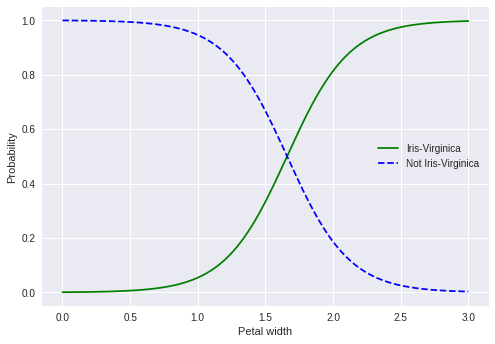

In [0]:
# Plotting the decision boundary.

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-Virginica')
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Petal width')
plt.show()

In [0]:
# Example predictions.

log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Softmax Regression

Logistic Regression can support multiple classes directly, this is called <i>Softmax Regression</i> or <i>Multinomial Logistic Regression</i>.

Given a sample, $\mathbf{x}$, the model first computes the scores of each class $s_k(\mathbf{x})$ which is given by

$ s_k(\mathbf{x}) = \left( \theta^{(k)}  \right)^T \cdot \mathbf{x} $

which is the equation for the Linear Regression prediction. The model then estimates the probability of the sample is in each class by applying the <i>softmax function</i> (or <i>normalized exponential</i>) given by

$ \hat{p}_k = \sigma(\mathbf{s}(\mathbf{x}))_k = \frac{\exp\,\left( s_k (\mathbf{x}) \right)}
{\sum\limits_{j=1}^K \, \exp\, \left( s_j(\mathbf{x}) \right) } $

where $K$ is the number of classes, $\mathbf{s}(\mathbf{x})$ is the vector containing the scores for each class, and $\sigma(\mathbf{s}(\mathbf{x}))_k$ is the probability that $\mathbf{x}$ is in class $k$.

Like the Linear Regression classifier, the model predicts that the sample, $\mathbf{x}$, is in the class $\hat{y}$, given by

$ \hat{y} =
\underset{k}{\text{argmax}} \; \sigma(\mathbf{s}(\mathbf{x}))_k =
\underset{k}{\text{argmax}} \; s_k(\mathbf{x}) =
\underset{k}{\text{argmax}} \, \left( \left( \theta^{(k)} \right)^T
\cdot \mathbf{x} \right) $

where the $\text{argmax}$ operator selects the parameter $k$ which maximizes the function. In order to find the optimal $\Theta$, the matrix of vectors used for each class for scoring, the model must minimize the <i>cross-entropy</i> cost function which is given by

$ J(\Theta) = - \frac{1}{m} \sum\limits_{i=1}^m
\sum\limits_{k=1}^K \, y_k^{(i)} \log\left( \hat{p}_k^{(i)} \right) $

where $y_k^{(i)}$ is 1 if the target class for the $i^{\text{th}}$ instance is $k$; otherwise it is 0. The model is penalized when it estimates a low probability for a target class. When $K=2$, the cost function is the same as Logistic Regression. The gradient vector with respect to $\theta^{(k)}$ for this cost function is given by

$ \nabla_{\theta^{(k)}} = \frac{1}{m} \sum\limits_{i=1}^m
\left( \hat{p}_k^{(i)} - y_k^{(i)} \right) \mathbf{x}^{(i)} $

which can be used for Gradient Descent.

In [0]:
# Using Softmax Regression with the Iris dataset.

X = iris['data'][:, (2, 3)] # petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial',
                                 solver='lbfgs', C=10)
softmax_reg.fit(X, y)

print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


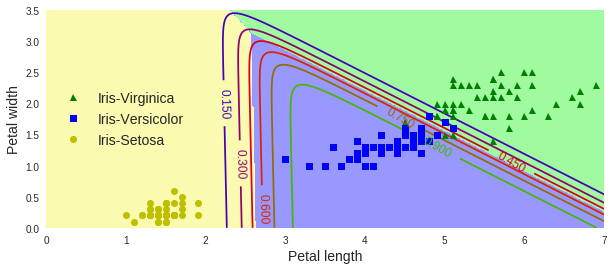

In [0]:
# Decision boundary for all 3 classes.

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

## Exercises

### 1. What Linear Regression training algorithm can you use if you have a training set with millions of features?

You can use stochastic gradient descent.

### 2. Suppose the features from your training set have very different scales. What algorithm might suffer from this and how? What can you do about it?

If features have different scales, then the gradient will look like an elongated
bowl, so Gradient Descent will take a long time to converge. Regularized models
may also falsely penalize features with a large weight. To address this, you
can scale your features using `StandardScaler`.

### 3. Can Gradient Descent get stuck in a local minimum while training a Logistic Regression model?

No, since the cost function for Logistic Regression is convex.

### 4. Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?

As long as the cost function for the regression is convex and the learning rate is not too high, then yes, they should all lead to the same model after enough iterations.

### 5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice the validation error consistently goes up, what is likely going on? How can you fix this?

The validation error consistently going up means that either the learning rate of the Gradient Descent algorithm is too high or that the model is starting to overfit the training data.

### 6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?

No, due to the random nature of Mini-batch Gradient Descent, you should stop iterating when the validation error begins consistently going up, rather than
when it only goes up once.

### 7. Which Gradient Descent algorithm will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?

Stochastic Gradient Descent will converge around the optimal solution the fastest. Batch Gradient Descent will actually converge on the optimal solution. Stochastic algorithms may bounce around near the optimal solution and not converge, but by adding Early Stopping you can have the stochastic algorithms converge on the closest they get to the optimal solution after a given number of iterations.

### 8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

A large gap between the training and validation error suggests that the model is overfitting the data. One thing you can do to help alleviate this is add regularization to your regression model. You could also reduce the degree of the polynomial features you are interested in. Lastly you can try increasing the size of the training set.

### 9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter, $\alpha$, or decrease it?

The model seems to be suffering from high variance, it cannot accurately predict either the output of the validation and test sets. One thing you can do is increase the regularization hyperparameter, $\alpha$, to decrease the regularization used in the model.

### 10. Why would you want to use:

#### Ridge Regression instead of plain Linear Regression?

Models with some regularization tend to outperform plain Linear Regression.

#### Lasso instead of Ridge Regression?

Lasso's $\ell_1$ regularization tends to cause unimportant features to vanish to zero. This provides some automatic feature selection that Ridge Regression does not.

#### Elastic Net instead of Lasso?

Lasso Regression can act wildly in some cases, such as when features are highly correlated to one another or when there are more features than training instances. Elastic Net provides some $\ell_2$ regularization to counteract this, and you can set the $\ell_1$ mixing hyperparameter close to 1 so that Elastic Net behaves somewhat like Lasso.

### 11. Suppose you want to classify pictures as outdoor/indoor and daytime/nightime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?

You should use a Softmax Regression to train your model since all four classes look pretty distinct.

### 12. Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn).

In [0]:
def to_one_hot(y):
  """
  Transform an numpy array of integers in [0, k) to a len(y) * k numpy array
  where  y_out[i][k] == 1 iff y[i] == k and is 0 otherwise.
  
  """
  classes = len(set(y))
  m = len(y)
  y_one_hot = np.zeros((m, classes))
  y_one_hot[np.arange(m), y] = 1
  return y_one_hot


def train_test_split(X, y, test_size=0.2):
  """
  Basic implementation of train-test splitting using random sampling.
  
  Assumes len(X) == len(y), test_size in [0, 1].
  
  """
  n = len(X)
  rand_idx = np.random.permutation(n)
  cutoff = int(n * (1. - test_size))
  X_train, X_test = X[rand_idx[:cutoff]], X[rand_idx[cutoff:]]
  y_train, y_test = y[rand_idx[:cutoff]], y[rand_idx[cutoff:]]
  return X_train, X_test, y_train, y_test


class Softmax:
  """
  Softmax Regression class which uses Mini-Batch Gradient Descent to train
  itself.
  
  Assumes that batch_size in [0, len(X)) where X is the training set.
  
  """
  def __init__(self, learning_rate=0.1, n_iter=5000, batch_size=10,
               n_batches=5):
    self.learning_rate_ = learning_rate
    self.n_iter_ = n_iter
    self.batch_size_ = batch_size
    self.n_batches_ = n_batches
    self.theta = None
    
  def fit(self, X, y):
    """
    The model is trained using Mini-Batch Gradient Descent using the
    experession for the gradient specified above.
    
    Assumes X to be a 2D np array, y to be a 2D np array of 0 or 1,
      len(X) == len(y), and that the output vector, y, is One-Hot Encoded.
    
    """
    m, n = X.shape
    K = len(y[0])
    self.theta = np.random.randn(K, n)
    for _ in range(self.n_iter_):
      rand_idx = np.random.permutation(len(X))
      for k in range(K):
        theta_k = self.theta[k]
        grad = np.zeros(n)
        for i in range(min(len(X) // self.batch_size_, self.n_batches_)):
          X_batch = X[rand_idx[i*self.batch_size_:(i+1)*self.batch_size_]]
          y_batch = y[rand_idx[i*self.batch_size_:(i+1)*self.batch_size_]]
          for x, y_ in zip(X_batch, y_batch):
            s_k = float(x.dot(theta_k))
            p_k = np.exp(s_k) / sum(np.exp(x.dot(self.theta[j])) for j in range(K))
            grad = np.add(grad, x * (p_k - y_[k]))
        grad /= float(m)
        self.theta[k] = np.add(self.theta[k], (-self.learning_rate_ * grad).reshape(1, -1))
    return self
  
  def predict(self, X):
    """
    Returns an output vector with the model's prediction of what class each
    instance in X belongs to. The output vector is One-Hot Encoded.
    
    Assumes X to be a 2D numpy array, model was trained.
    
    """
    K = len(self.theta)
    y = np.zeros((len(X), K))
    for x, y_ in zip(X, y):
      best_probability = -float('inf')
      best_idx = -1
      for k in range(K):
        p = x.dot(self.theta[k])
        if p > best_probability:
          best_probability = p
          best_idx = k
      y_[best_idx] = 1
    return y

  def score(self, X, y):
    """
    Score the model's performance using an input, and its actual output. It
    returns the accuracy of the model, i.e.
    
    TP / (TP + FN)
    
    Makes the same assumptions as .predict()
    
    """
    y_pred = self.predict(X)
    correct = 0.
    for y1, y2 in zip(y, y_pred):
      if np.allclose(y1, y2):
        correct += 1
    return correct / len(X)

X, y = iris['data'], to_one_hot(iris['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y)

softmax = Softmax().fit(X_train, y_train)
softmax.score(X_test, y_test)

0.9666666666666667